<a href="https://colab.research.google.com/github/rahiakela/transformers-research-and-practice/blob/main/attention-and-transformers-mechanism/attention-mechanism/scaled_dot_product_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Scaled dot product basic

In this notebook, we will discuss a very important concept **scaled dot product"" instead of **normal dot product** as the similarity function. The scaled dot product is exactly the same as the dot product, but scaled with a factor of $\frac{1}{\sqrt(dim)}$.

Here let us pose some problems and devise the solutions ourselves. The scaling factor will be hidden inside the solution.




##Setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch.nn.functional as nn 

In [13]:
def softmax(x):
  """Compute softmax values for each sets of scores in x."""
  return np.exp(x) / np.sum(np.exp(x), axis=0)

##Problems

  - **Vanishing Gradient Problem**: The weights of a Neural Network update in proportion to the gradient of the loss. The problem is that, in some cases, the gradient will be small, effectively preventing the weight from changing its value at all. This, in turn, prohibits the network from learning any further. This is often referred to as the vanishing gradient problem.
  - **Unnormalized softmax**: Consider a normal distribution. The softmax of the distribution is heavily dependent on its standard deviation. With a huge standard deviation, the softmax will result in a peak with zeros all around.
  - **Unnormalized softmax leading to the vanishing gradient**: Consider if your logits pass through softmax and then we have a loss (cross-entropy). The errors that backpropagate will be dependent on the softmax output.

(array([   4.,   58.,  380., 1306., 2588., 2950., 1866.,  690.,  135.,
          23.]),
 array([-400.20111534, -323.69242149, -247.18372765, -170.6750338 ,
         -94.16633995,  -17.6576461 ,   58.85104774,  135.35974159,
         211.86843544,  288.37712929,  364.88582314]),
 <a list of 10 Patch objects>)

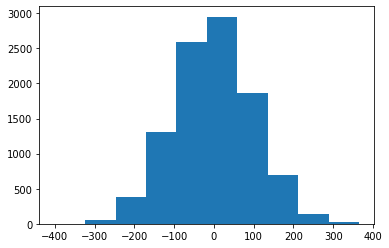

In [3]:
# create a normal distribution with mean 0 and std 100
a = np.random.normal(0, 100, size=(10000))

# visualize the data
plt.hist(a)

(array([9.999e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.09421852, 0.18843705, 0.28265557, 0.3768741 ,
        0.47109262, 0.56531114, 0.65952967, 0.75374819, 0.84796671,
        0.94218524]),
 <a list of 10 Patch objects>)

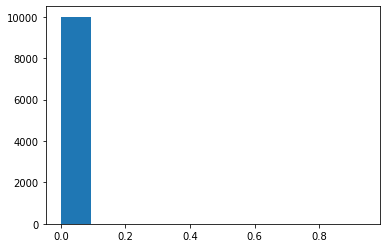

In [14]:
# visualize the softmax of the distribution
plt.hist(softmax(a))

Now assume that you have an unnormalized softmax function, as mentioned above. The error corresponding to the peak will definitely be back-propagated, while the others (corresponding to zeros in the softmax) will not flow at all. This gives rise to the vanishing gradient problem.

##Solution

To counter the problem of vanishing gradients due to unnormalized softmax, we need to find a way to have a better softmax output.

It turns out that the standard deviation of a distribution largely influences the softmax output. 

Let’s create a normal distribution with a standard deviation of 100. We also scale the distribution so that the standard deviation is unity.

In [15]:
# create a normal distribution with mean 0 and std 100
std = np.random.normal(0, 100, size=(10000))

# scale the distribution to have 1 std
unit_std = std / 100

np.std(std)

99.26582231336072

In [16]:
np.std(unit_std)

0.9926582231336071

(array([   5.,   26.,  228., 1016., 2211., 3106., 2188.,  970.,  220.,
          30.]),
 array([-423.43440968, -346.42921318, -269.42401668, -192.41882017,
        -115.41362367,  -38.40842717,   38.59676934,  115.60196584,
         192.60716234,  269.61235885,  346.61755535]),
 <a list of 10 Patch objects>)

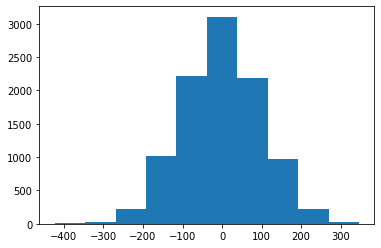

In [17]:
# visualize the data
plt.hist(std)

(array([   5.,   26.,  228., 1016., 2211., 3106., 2188.,  970.,  220.,
          30.]),
 array([-4.2343441 , -3.46429213, -2.69424017, -1.9241882 , -1.15413624,
        -0.38408427,  0.38596769,  1.15601966,  1.92607162,  2.69612359,
         3.46617555]),
 <a list of 10 Patch objects>)

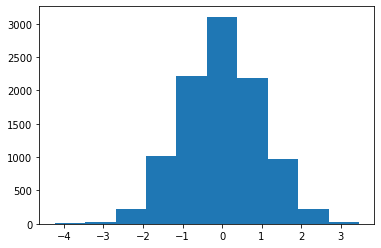

In [18]:
plt.hist(unit_std)

The histograms of both distributions seem alike. One is the scaled version of the other (look at the x-axis).

Let’s calculate the softmax of both and visualize them.

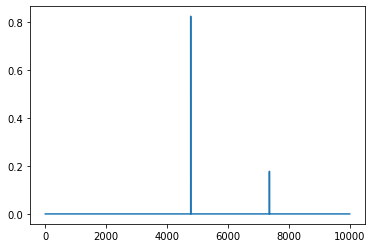

In [20]:
softmax_std = softmax(std)
softmax_unit_std = softmax(unit_std)

plt.plot(softmax_std)

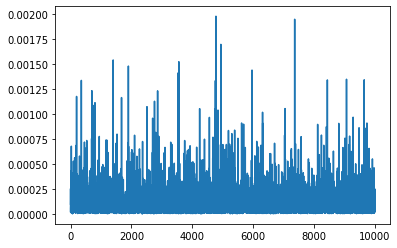

In [21]:
plt.plot(softmax_unit_std)

Scaling the distribution to unit standard deviation provides a distributed softmax output. This softmax allows the gradients to backpropagate, saving our model from collapsing.

Scaling of the Dot Product

We came across the vanishing gradient problem, the unnormalized softmax output, and also a way we can counter it. We are yet to understand the relationship between the above-mentioned problems and solutions to that of the scaled dot product proposed by the authors.

The attention layers consist of a similarity function that takes two vectors and performs a dot product. This dot product is then passed through a softmax to create the attention weights. This recipe is perfect for a vanishing gradient problem. The way to counter the problem is to transform the dot product result into a unit standard deviation distribution.

Let us assume that we have two independent and randomly distributed variables: `a` and `b`. Both vectors have a mean of 0 and a standard deviation of 1.

In [22]:
c = []
for i in range(100):
  a = np.random.normal(0, 1, size=(100))
  b = np.random.normal(0, 1, size=(100))
  c.append(np.dot(a, b))

In [23]:
np.mean(c)

-0.166758432261435

In [24]:
np.var(c)

108.07164084317037

In [25]:
np.std(c)

10.39575109567223

What is interesting here is that the mean of such a dot product remains to be 0 regardless of the size of the random variables, but the variance and, in turn, the standard deviation are directly proportional to the size of the random variables. 

To be specific, variance is linearly proportional while standard deviation is proportional with the factor of $\sqrt(dim)$.

To prohibit the dot product from a vanishing gradient problem, the authors scale the dot product with the $\frac{1}{\sqrt(dim}$ factor. This, in turn, is the scaled dot product that the authors have suggested in the paper. 
